# Assignment 5(due on 12/20)

## Student:万思晨（12332276），Gtihub：Wanxiaochen

## 批改人：吴昊天

## 得分：55/40

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import xlrd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import scipy
print(scipy.__file__)

d:\software\anaconda\envs\TA\lib\site-packages\scipy\__init__.py


#1.1

In [3]:
#导入化石燃料CO2排放数据
global_fossil=pd.read_csv("Global Fossil-Fuel CO2 Emissions.csv")
global_fossil

,Year,Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C),Carbon emissions from gas fuel consumption,Carbon emissions from liquid fuel consumption,Carbon emissions from solid fuel consumption,Carbon emissions from cement production,Carbon emissions from gas flaring,Per capita carbon emissions (metric tons of carbon; after 1949 only)
0,1751,3,0,0,3,0,0,NaN
1,1752,3,0,0,3,0,0,NaN
2,1753,3,0,0,3,0,0,NaN
3,1754,3,0,0,3,0,0,NaN
4,1755,3,0,0,3,0,0,NaN
...,...,...,...,...,...,...,...,...
259,2010,9128,1696,3107,3812,446,67,1.32
260,2011,9503,1756,3134,4055,494,64,1.36
261,2012,9673,1783,3200,4106,519,65,1.36
262,2013,9773,1806,3220,4126,554,68,1.36


In [4]:
#提取总排放数据
fossil_total = global_fossil[['Year', 'Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)']]
fossil_total

,Year,Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)
0,1751,3
1,1752,3
2,1753,3
3,1754,3
4,1755,3
...,...,...
259,2010,9128
260,2011,9503
261,2012,9673
262,2013,9773


In [5]:
#改为浮点型
fossil_total['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'] = fossil_total['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'].astype(float)

C:\Users\Wu\AppData\Local\Temp\ipykernel_28120\2607159560.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fossil_total['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'] = fossil_total['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'].astype(float)


In [6]:
#将百万吨转化为克
def convert_to_PgC(million_metric_tons):
    grams = million_metric_tons * 1e12
    return (grams / 1e15)

fossil_total['PgC'] = fossil_total['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'].apply(convert_to_PgC)
fossil_total

C:\Users\Wu\AppData\Local\Temp\ipykernel_28120\3749895267.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fossil_total['PgC'] = fossil_total['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'].apply(convert_to_PgC)


,Year,Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C),PgC
0,1751,3.0,0.003
1,1752,3.0,0.003
2,1753,3.0,0.003
3,1754,3.0,0.003
4,1755,3.0,0.003
...,...,...,...
259,2010,9128.0,9.128
260,2011,9503.0,9.503
261,2012,9673.0,9.673
262,2013,9773.0,9.773


In [7]:
fossil_1987_2004 = fossil_total[(fossil_total['Year'] >= 1987) & (fossil_total['Year'] <= 2004)]
PgC = fossil_1987_2004[['Year', 'PgC']]
PgC

,Year,PgC
236,1987,5.725
237,1988,5.936
238,1989,6.066
239,1990,6.074
240,1991,6.142
241,1992,6.078
242,1993,6.070
243,1994,6.174
244,1995,6.305
245,1996,6.448


In [8]:
calculation_without_buffer = []

N1 = 740
N2 = 900
k12 = 105 / 740
k21 = 102 / 900
num_years = len(PgC)

for i in range(num_years):
    year = PgC['Year'].iloc[i]
    gama = PgC['PgC'].iloc[i]

    dN1_dt = -k12 * N1 + k21 * N2 + gama
    dN2_dt = k12 * N1 - k21 * N2

    dt = 1
    N1 += dN1_dt * dt
    N2 += dN2_dt * dt

    calculation_without_buffer.append(N1/2.13)
calculation_without_buffer

[348.69718309859155,
 350.0536829082604,
 351.44084611781557,
 352.8004867167128,
 354.16822384864224,
 355.4836373965159,
 356.78296741785744,
 358.12247532887113,
 359.51011642127673,
 360.9462099618703,
 362.40956650246096,
 363.85765976261683,
 365.27901755439615,
 366.76745874890116,
 368.30937996643246,
 369.87194552758615,
 371.58718537964984,
 373.42941644742604]

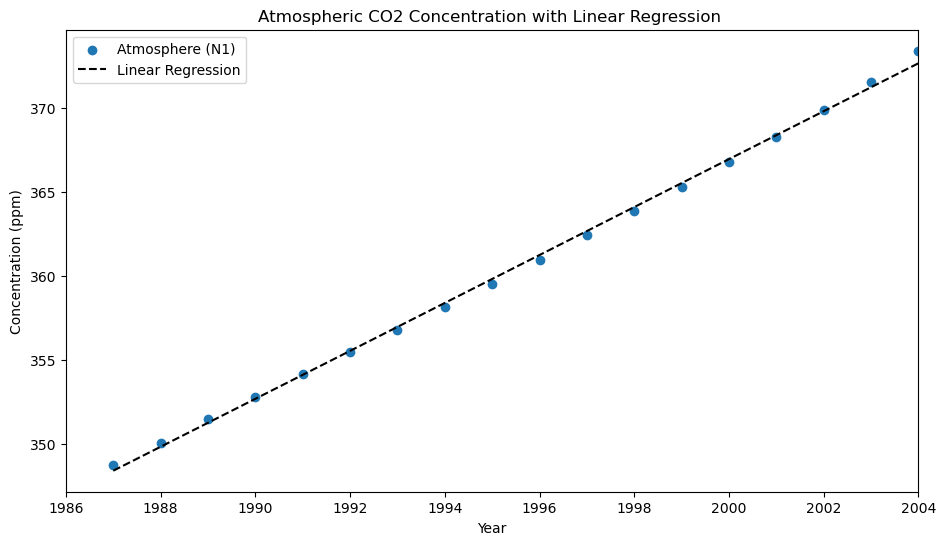

In [11]:
x = np.arange(1987, 2005, 1).reshape(-1, 1) 
y = np.array(calculation_without_buffer).reshape(-1, 1)

#利用线性模型进行计算数据拟合
regressor = LinearRegression()
regressor.fit(x, y)
predicted_CO2 = regressor.predict(x)

plt.figure(figsize=(11, 6))
plt.scatter(x, y, label='Atmosphere (N1)')
plt.plot(x, predicted_CO2, color='black', linestyle='--', label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('Concentration (ppm)')
plt.xlim(1986, 2004)
plt.title('Atmospheric CO2 Concentration with Linear Regression ')
plt.legend()
plt.show()

#1.2

In [12]:
calculation_with_buffer = []

N1 = 740
N2 = 900
k12 = 105 / 740
k21 = 102 / 900
N20 = 821
num_years = len(PgC)

for i in range(num_years):
    year = PgC['Year'].iloc[i]
    gama = PgC['PgC'].iloc[i]
    z = N1 / 2.13
    #缓冲因子计算
    xi = 3.69 + 1.86 * 10**(-2) * z - 1.80 * 10**(-6) * z**2

    dN1_dt = -k12 * N1 + k21 * (N20 + xi * (N2 - N20)) + gama
    dN2_dt = k12 * N1 - k21 * (N20 + xi * (N2 - N20))

    dt = 1
    N1 += dN1_dt * dt
    N2 += dN2_dt * dt

    calculation_with_buffer.append(N1 / 2.13)
calculation_with_buffer

[386.2537403122254,
 379.0493869555909,
 384.7838846920407,
 386.3694504535765,
 389.30894226843975,
 391.7871129200602,
 394.40980804639815,
 397.03493105431323,
 399.733897470765,
 402.49096544498013,
 405.29651780467117,
 408.10900333946074,
 410.9171483195148,
 413.8088535825361,
 416.76793511312906,
 419.7714472295548,
 422.9529894162239,
 426.2894804345742]

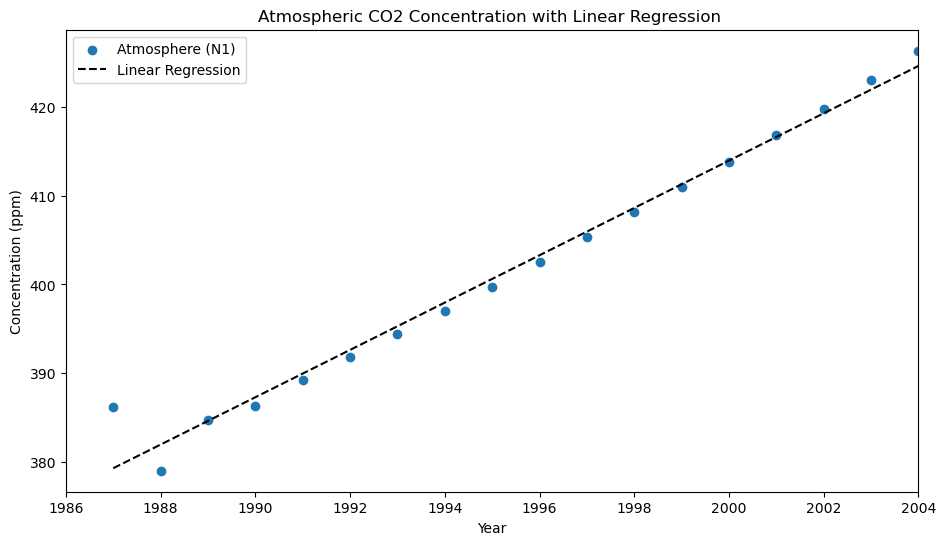

In [13]:
X = np.arange(1987, 2005, 1).reshape(-1, 1) 
Y = np.array(calculation_with_buffer).reshape(-1, 1)

#利用线性模型进行计算数据拟合
regressor = LinearRegression()
regressor.fit(X, Y)
predicted_CO2_buffer = regressor.predict(X)

plt.figure(figsize=(11, 6))
plt.scatter(X, Y, label='Atmosphere (N1)')
plt.plot(X, predicted_CO2_buffer, color='black', linestyle='--', label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('Concentration (ppm)')
plt.xlim(1986, 2004)
plt.title('Atmospheric CO2 Concentration with Linear Regression ')
plt.legend()
plt.show()

#1.3

In [14]:
#导入观测数据
CO2_mean = pd.read_csv('Mauna Loa CO2 annual mean data.csv', comment='#')
CO2_annual = CO2_mean[(CO2_mean['year'] >= 1986) & (CO2_mean['year'] <= 2004)]
CO2_annual

,year,mean,unc
27,1986,347.61,0.12
28,1987,349.31,0.12
29,1988,351.69,0.12
30,1989,353.20,0.12
31,1990,354.45,0.12
32,1991,355.70,0.12
33,1992,356.54,0.12
34,1993,357.21,0.12
35,1994,358.96,0.12
36,1995,360.97,0.12


In [15]:
#提取1987—2004年的观测数据
time_observations = CO2_mean[(CO2_mean['year'] >= 1987) & (CO2_mean['year'] <= 2004)]

In [16]:
years_1987 = time_observations['year']
years_1987

28    1987
29    1988
30    1989
31    1990
32    1991
33    1992
34    1993
35    1994
36    1995
37    1996
38    1997
39    1998
40    1999
41    2000
42    2001
43    2002
44    2003
45    2004
Name: year, dtype: int64

In [17]:
observations_1987 = time_observations['mean']
observations_1987

28    349.31
29    351.69
30    353.20
31    354.45
32    355.70
33    356.54
34    357.21
35    358.96
36    360.97
37    362.74
38    363.88
39    366.84
40    368.54
41    369.71
42    371.32
43    373.45
44    375.98
45    377.70
Name: mean, dtype: float64

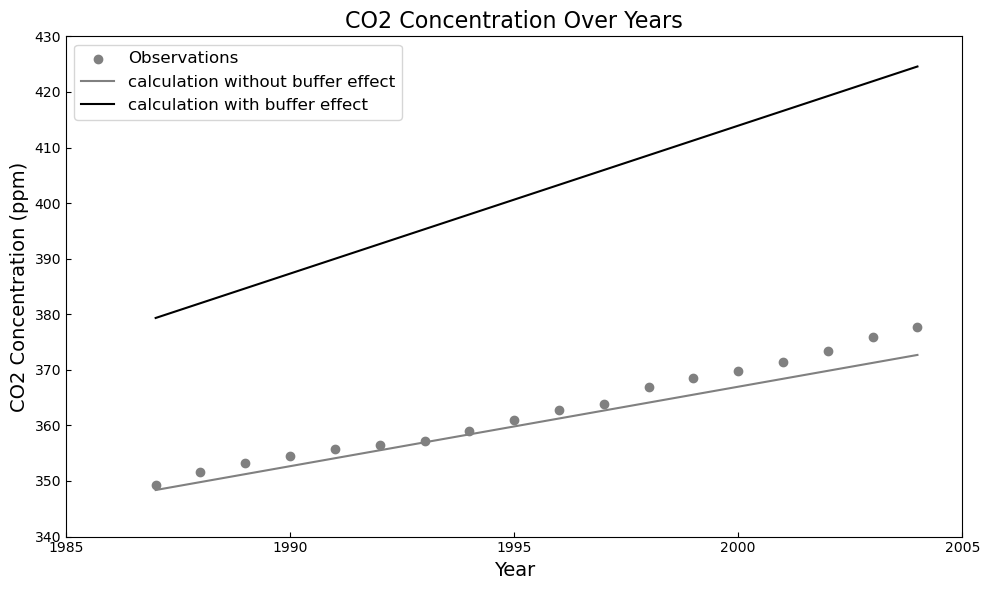

In [18]:
plt.figure(figsize=(10, 6))

#把观测数据的散点，与上方是否带buffer效应的模拟结果画到一张图上
plt.scatter(years_1987, observations_1987, color='grey', label='Observations')
plt.plot(x, predicted_CO2, color='grey', linestyle='-', label='calculation without buffer effect')
plt.plot(X, predicted_CO2_buffer, color='black', linestyle='-', label='calculation with buffer effect')

plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.xlabel('Year', fontsize=14)
plt.ylabel('CO2 Concentration (ppm)', fontsize=14)
plt.title('CO2 Concentration Over Years', fontsize=16)
plt.xticks(np.arange(1985, 2006, 5))
plt.xlim(1985, 2005)
plt.ylim(340, 430)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

#1.4

In [19]:
#导入土地利用数据
land_use = pd.read_excel('Global_land-use_flux-1750_2005.xls')
land_use

,Year,Global,USA,Canada,S+C America,Europe,Nafrica/Meast,Trop.Africa,Frmr USSR,China,S+SE Asia,Pac.Dev.Reg
0,1750,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1751,203.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1752,206.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1753,209.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1754,212.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
251,2001,1385.4,-31.9488,17.6121,643.1904,-18.0804,23.2448,261.6969,20.1075,-12.9153,478.5329,3.9161
252,2002,1517.7,-31.9488,17.6121,625.5099,-18.0804,23.2448,258.5236,20.1075,-12.9153,631.6960,3.9161
253,2003,1513.2,-31.9488,17.6121,616.4536,-18.0804,23.2448,225.5212,20.1075,-12.9153,669.2975,3.9161
254,2004,1534.9,-31.9488,17.6121,609.3525,-18.0804,23.2448,225.7864,20.1075,-12.9153,697.8432,3.9161


In [20]:
#计算土地利用变化所引起的排放量并统一单位为ppm
land_use = land_use[['Year', 'Global']]
land_use['LandUseChange'] = land_use['Global'] * ( 1e12 / 1e15 ) / 2.13
land_use

C:\Users\Wu\AppData\Local\Temp\ipykernel_28120\1589546172.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  land_use['LandUseChange'] = land_use['Global'] * ( 1e12 / 1e15 ) / 2.13


,Year,Global,LandUseChange
0,1750,200.0,0.093897
1,1751,203.0,0.095305
2,1752,206.0,0.096714
3,1753,209.0,0.098122
4,1754,212.0,0.099531
...,...,...,...
251,2001,1385.4,0.650423
252,2002,1517.7,0.712535
253,2003,1513.2,0.710423
254,2004,1534.9,0.720610


In [21]:
#计算化石燃料燃烧所引起的排放量（总-水泥）并统一单位为ppm
fossil_fuel = global_fossil[['Year', 'Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)', 'Carbon emissions from cement production']]
fossil_fuel['Fossil_Fire_Emissions'] = fossil_fuel['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'] - fossil_fuel['Carbon emissions from cement production']
fossil_fuel['EmissionFactor'] = fossil_fuel['Fossil_Fire_Emissions'] * ( 1e12 / 1e15 ) / 2.13
fossil_fuel

C:\Users\Wu\AppData\Local\Temp\ipykernel_28120\2412235224.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fossil_fuel['Fossil_Fire_Emissions'] = fossil_fuel['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'] - fossil_fuel['Carbon emissions from cement production']
C:\Users\Wu\AppData\Local\Temp\ipykernel_28120\2412235224.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fossil_fuel['EmissionFactor'] = fossil_fuel['Fossil_Fire_Emissions'] * ( 1e12 / 

,Year,Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C),Carbon emissions from cement production,Fossil_Fire_Emissions,EmissionFactor
0,1751,3,0,3,0.001408
1,1752,3,0,3,0.001408
2,1753,3,0,3,0.001408
3,1754,3,0,3,0.001408
4,1755,3,0,3,0.001408
...,...,...,...,...,...
259,2010,9128,446,8682,4.076056
260,2011,9503,494,9009,4.229577
261,2012,9673,519,9154,4.297653
262,2013,9773,554,9219,4.328169


In [22]:
#加入参数定义
k12, k21, k23, k24, k32, k34, k43, k45, k51, k67, k71 = [60 / 615, 60 / 842, 9 / 842, 43 / 842, 52 / 9744, 162 / 9744, 205 / 26280, 0.2 / 26280, 0.2 / 90000000, 62 / 731, 62 / 1238]
N2_0 = 842 / 2.13

#设置初始条件
initial_conditions = [615 / 2.13, 842 / 2.13, 9744 / 2.13, 26280 / 2.13, 90000000 / 2.13, 731 / 2.13, 1238 / 2.13]
f0 = 62 / 2.13
P0 = 615 / 2.13

#设置不同的施肥因子
beta_values = [0.38, 0.5]
results = []

for beta in beta_values:
    N1, N2, N3, N4, N5, N6, N7 = initial_conditions.copy()
    atmosphere = [N1]
    
    for year in range(1751, 2001):
        gamma = fossil_fuel[fossil_fuel['Year'] == year]['EmissionFactor'].values[0]
        delta = land_use[land_use['Year'] == year]['LandUseChange'].values[0]
        xi = 3.69 + 0.0186 * N1 - 0.0000018 * N1**2
        
        f = f0 * (1 + beta * np.log(N1 / P0))
        
        dN1_dt = -k12 * N1 + k21 * (N2_0 + xi * (N2 - N2_0)) + gamma - f + delta + k51 * N5 + k71 * N7
        dN2_dt = k12 * N1 - k21 * (N2_0 + xi * (N2 - N2_0)) - k23 * N2 + k32 * N3 - k24 * N2
        dN3_dt = k23 * N2 - k32 * N3 - k34 * N3 + k43 * N4
        dN4_dt = k34 * N3 - k43 * N4 + k24 * N2 - k45 * N4
        dN5_dt = k45 * N4 - k51 * N5
        dN6_dt = f - k67 * N6 - 2 * delta
        dN7_dt = k67 * N6 - k71 * N7 + delta
        
        N1 += dN1_dt
        N2 += dN2_dt
        N3 += dN3_dt
        N4 += dN4_dt
        N5 += dN5_dt
        N6 += dN6_dt
        N7 += dN7_dt

        atmosphere.append(N1)
    results.append(atmosphere)
results

[[288.7323943661972,
  288.9230046948357,
  289.0939006300759,
  289.2586023616581,
  289.4194757493596,
  289.5766528131033,
  289.72988366058445,
  289.87891182601504,
  290.02354246422317,
  290.1636475481019,
  290.2991589180611,
  290.43005969638637,
  290.5563761749265,
  290.67817053948517,
  290.7955344366703,
  290.9085833199174,
  291.0174515021039,
  291.12228784500894,
  291.22325202094044,
  291.3205112871069,
  291.41423771833666,
  291.50507533202756,
  291.5926662403506,
  291.6772219261644,
  291.75892194204386,
  291.8379360727018,
  291.91442821038027,
  291.98855661127203,
  292.0604735358422,
  292.1303248741094,
  292.198249864081,
  292.26485039530155,
  292.3297191778173,
  292.39301242313195,
  292.45485012549574,
  292.51533950023145,
  292.574579914687,
  292.6326640503728,
  292.6896783140622,
  292.7457031115917,
  292.8008131057245,
  292.8555469626719,
  292.9094359639567,
  292.9625767775451,
  293.01503206073204,
  293.06685408630767,
  293.118089777808

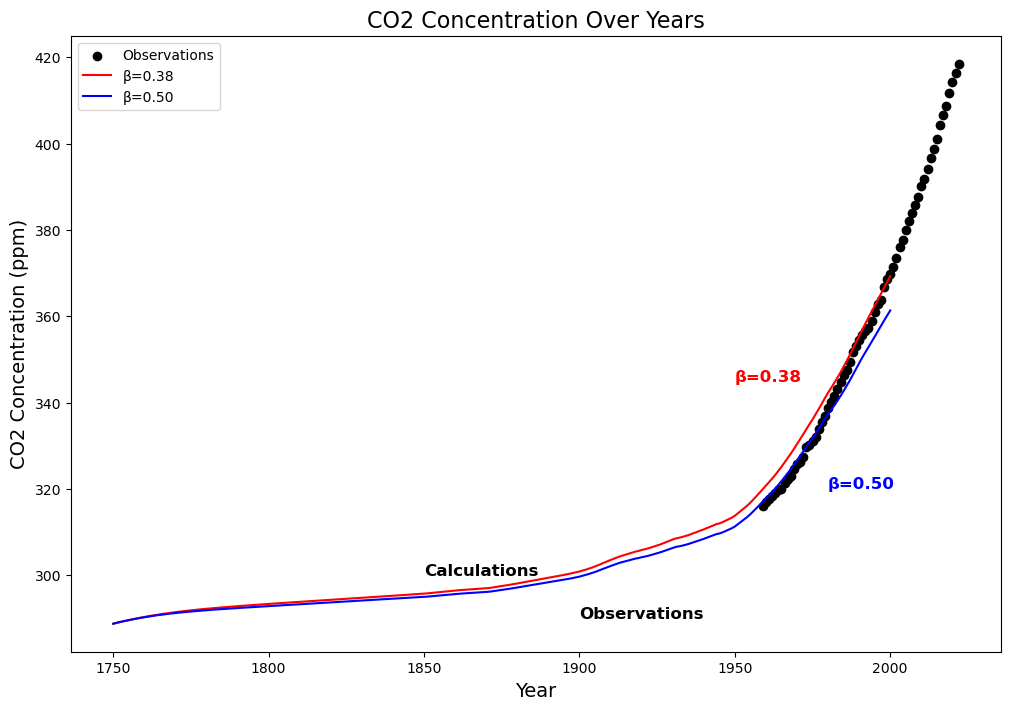

In [23]:
plt.figure(figsize=(12, 8))

plt.scatter(CO2_mean['year'], CO2_mean['mean'], label='Observations', color='black')

plt.text(1850, 300, 'Calculations', fontsize=12, fontweight='bold')
plt.text(1900, 290, 'Observations', fontsize=12, fontweight='bold')
plt.text(1950, 345, 'β=0.38', fontsize=12, fontweight='bold', color='red')
plt.text(1980, 320, 'β=0.50', fontsize=12, fontweight='bold', color='blue')
plt.plot(range(1750, 2001), results[0], color='red', label='β=0.38')
plt.plot(range(1750, 2001), results[1], color='blue', label='β=0.50')
plt.xlabel('Year', fontsize=14)
plt.ylabel('CO2 Concentration (ppm)', fontsize=14)
plt.title('CO2 Concentration Over Years', fontsize=16)
plt.legend()
plt.show()